In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 39.2MB/s]
Archive:  wine-quality.zip
  inflating: winequalityN.csv        

外れ値を除去する前の行数 = 6497



<Figure size 57600x28800 with 0 Axes>

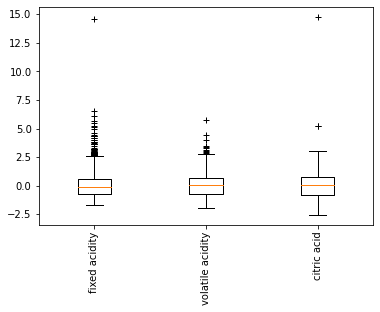


外れ値を除去した後の行数 = 4370


<Figure size 57600x28800 with 0 Axes>

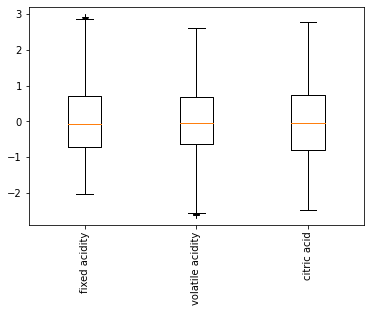

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# データの準備
def prepare():
    !kaggle datasets download -d rajyellow46/wine-quality
    !unzip wine-quality.zip

# データの前処理（データフレームへの読み込み）
def preprocess():
    df = pd.read_csv('winequalityN.csv')
    fields = ['fixed acidity', 'volatile acidity', 
               'citric acid', 'residual sugar', 
               'chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide','density', 'pH',
               'sulphates', 'alcohol', 'quality']
    data = df.loc[:, fields]
    return data, fields
# 四分位範囲による外れ値の除去
def remove_outlier(data, fields):
    for target_col in fields: 
        # 第1四分位数(25パーセンタイル)
        q1 = data[target_col].quantile(0.25) 
        # 第3四分位数(75パーセンタイル)
        q3 = data[target_col].quantile(0.75) 
        # 四分位範囲
        iqr = q3 - q1 
        iqr_min = q1 - 1.5 * iqr
        iqr_max = q3 + 1.5 * iqr
        df_iqr = data.loc[
        (data[target_col]>iqr_min) \
        & (data[target_col]<iqr_max)]
        data = df_iqr
    return data
# 箱ひげ図を描く
def disp_box(data, fields, name):
    plt.figure(figsize=(800,400))
    fig, ax = plt.subplots()
    dt = data.loc[:, fields[5:8]]
    sc = StandardScaler()
    dt = sc.fit_transform(dt)
    bp = ax.boxplot(dt,
         notch=False, sym='+', vert=True, whis=1.5,
         positions=None, widths=None,
         patch_artist=False, bootstrap=None, 
         usermedians=None, conf_intervals=None)
    ax.set_xticklabels(fields)
    plt.xticks(rotation=90) 
    plt.savefig('3.6_{}.png'.format(name), dpi=500)
    plt.show()

def main():
    prepare()
    data, fields = preprocess()
    print('\n外れ値を除去する前の行数 = {}\n'.format(
                                           len(data)))
    # データの可視化
    disp_box(data, fields, 'before')
    # 外れ値の除去
    data = remove_outlier(data, fields)
    print('\n外れ値を除去した後の行数 = {}'.format(
                                          len(data)))
    # データの可視化
    disp_box(data, fields, 'after')

if __name__ == '__main__':
    main()
